In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from abc import ABC, abstractmethod

In [3]:
class AbstractPlate(ABC):
    
    def __init__(self, l = 1, N = 100):
        
        # constantes:
        self.length    = l     # comprimento da barra [m]
        self.divisions = N     # número de divisões do domínio

        # vetor usado para a plotagem:
        self.x_coords = np.linspace(0.0, self.length, N + 1)
        self.temps    = np.zeros(N + 1)

        self.delta_x = self.length / N
        self.delta_t = pow(self.delta_x, 2) * 0.2
        self.cte     = self.delta_t / pow(self.delta_x, 2)

    @abstractmethod
    def set_inicial_cond(self) -> None:
        pass
 
    # efetua a mudança de temp.:
    def change_temp(self, k_final):
        prev = self.temps
        for k in range(1, k_final + 1):
            for i in range(1, self.divisions):
                self.temps[i] += self.cte * prev[i + 1]
                self.temps[i] += self.cte * prev[i - 1]
                self.temps[i] -= self.cte * prev[i] * 2
            prev = np.copy(self.temps)
        
        self.current_time = k * self.delta_t
    
    # exibe o perfil de temperatura:
    def figure(self):
        fig = plt.figure()
        fig.suptitle('t = %.3f'%self.current_time, fontsize = 18, fontweight = 'bold')

        profile = fig.add_subplot()
        profile.grid(True)

        profile.set_ylabel('$T$ $[^{\circ}C]$', fontsize = 18)
        profile.set_xlabel('$x$ $[m]$', fontsize = 18)

        plt.plot(self.x_coords, self.temps, '-r', lw = 4)
        plt.savefig('figura-1.pdf', format ='pdf', dpi = 1200, bbox_inches = 'tight')
        return fig
    
    #def update():

***
### Perfil do código de ref.:

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


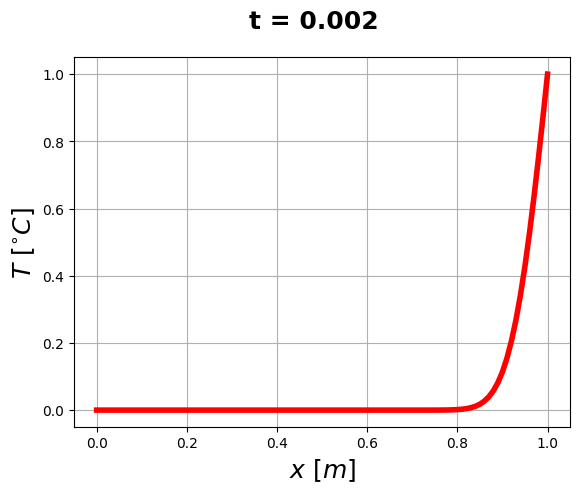

In [4]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 0
        self.temps[N] = Temp_il             # T(L,t) = 1

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "1"
}

exe = Bar()
exe.set_inicial_cond(**boundaries)
exe.change_temp(100)
exe.show()

print("delta x: ", exe.delta_x,
    "\ndelta t: ", exe.delta_t,
    "\ncte    : ", exe.cte)

***
### Propostas:

Apresente a solução de cada problema em diferentes instantes de tempo (escolha pelo menos 4 instantes de tempo para cada caso: um no começo, dois intermediários e um representando o regime permanente, ou seja, para $t$ grande). Comente o que acontece com o perfil de temperatura quando $t\to \inf$. É o esperado? Compare a solução em cada tempo com a solução analítica. Resolva com diferentes valores de $\Delta x$ e compare os resultados. Em todos os problemas deve ser analisada também a dependência da solução com o tamanho do $\Delta x$ e do $\Delta t$ escolhidos. Atenção: devemos ter sempre $\Delta t < \frac{\Delta x^{2}}{2}$. O que acontece quando essa condição não é obedecida? Faça alguns testes. Investigue também qual é a influência de alpha na solução. Os códigos desenvolvidos devem ser enviados separadamente.

### Solução geral:

$$\frac{\partial T(x,t)}{\partial t} = \frac{\partial^{2} T(x,t)}{\partial x^{2}}$$

$$t > 0,\qquad 0 < x < L$$

### Solução numérica - Problema 1:

**Condições de contorno:**

$$\begin{align*}
T(0,t) = 0 \quad \text{e} \quad T(L,t) = 0, \quad & \text{para} \; \: t\ge 0  \\
T(x,0) = 1, \quad & \text{para} \; \: 0 < x < L                               \\
\end{align*}$$

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


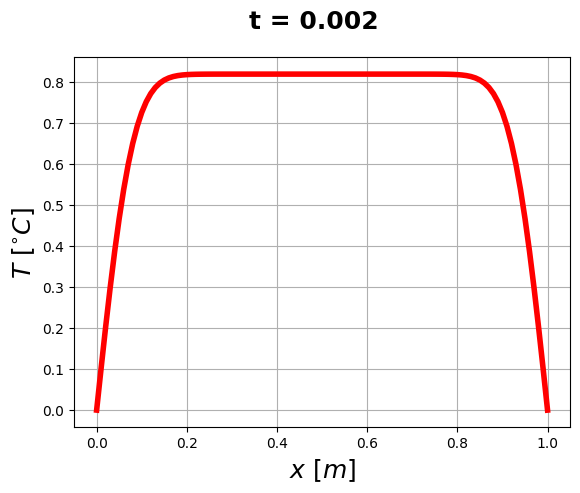

In [5]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições iniciais:
        T_boundary = np.ones(N + 1)         # T(x,0) = 1
        
        # impondo as condições de contorno:
        T_boundary[0] = Temp_i0             # T(0,t) = 0
        T_boundary[N] = Temp_il             # T(L,t) = 0
        self.temps = np.copy(T_boundary)

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

bar = Bar()
bar.set_inicial_cond(**boundaries)
bar.change_temp(100)
bar.figure()

print("delta x: ", bar.delta_x,
    "\ndelta t: ", bar.delta_t,
    "\ncte    : ", bar.cte)

***
### Solução numérica - Problema 2:

**Condições de contorno:**

$$\begin{align*}
T(0,t) = 1 \quad \text{e} \quad T(L,t) = 0, \quad & \text{para} \; \: t\ge 0  \\
T(x,0) = 0, \quad & \text{para} \; \: 0 < x < L                               \\
\end{align*}$$

delta x:  0.01 
delta t:  2e-05 
cte    :  0.2


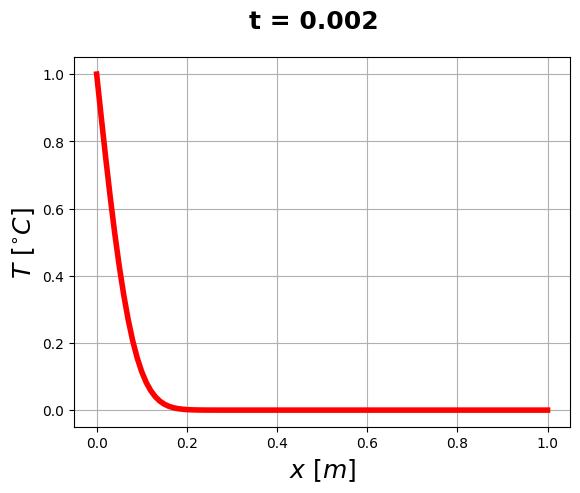

In [6]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:
        N = self.divisions
        
        # impondo as condições de contorno:
        #                                     T(x,0) = 0
        self.temps[0] = Temp_i0             # T(0,t) = 1
        self.temps[N] = Temp_il             # T(L,t) = 0
        
# condições de contorno:
boundaries = {
    "Temp_i0" : "1",
    "Temp_il" : "0"
}

sec_bar = Bar()
sec_bar.set_inicial_cond(**boundaries)
sec_bar.change_temp(100)
sec_bar.figure()

print("delta x: ", sec_bar.delta_x,
    "\ndelta t: ", sec_bar.delta_t,
    "\ncte    : ", sec_bar.cte)

***
### Solução numérica - Problema 3:

**Condições de contorno:**

$$\begin{align*}
T(0,t) = 0 \quad \text{e} \quad T(L,t) = 0, \quad & \text{para} \; \: t\ge 0  \\
T(x,0) = sin(\frac{\pi x}{2}), \quad & \text{para} \; \: 0 < x < L            \\
\end{align*}$$

delta x:  0.02 
delta t:  8e-05 
cte    :  0.2


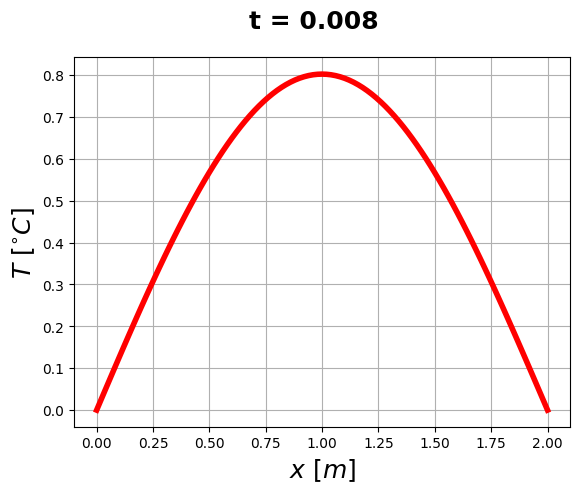

In [7]:
class Bar(AbstractPlate):
    
    def set_inicial_cond(self, Temp_i0, Temp_il) -> None:

        # impondo as condições iniciais:
        # T(0,t) = T(L,t) = 0
        T_boundary = np.copy(self.temps)
        for i in range(self.divisions):
            x = i * self.delta_x
            T_boundary[i] = np.sin(np.pi * x / 2) # T(x,0) = sin(pi*x/2)
        
        self.temps = np.copy(T_boundary)

# condições de contorno:
boundaries = {
    "Temp_i0" : "0",
    "Temp_il" : "0"
}

# L = 2:
thr_bar = Bar(l = 2)
thr_bar.set_inicial_cond(**boundaries)
thr_bar.change_temp(100)
thr_bar.figure()

print("delta x: ", thr_bar.delta_x,
    "\ndelta t: ", thr_bar.delta_t,
    "\ncte    : ", thr_bar.cte)

#---------------------------------------------------------------------------------------------------------------------------------------

# gifs:

#ani = animation.FuncAnimation(fig, thr_bar.update, emitter, interval=50,
#                              blit=True, save_count=100)


***
### Código para a solução númerica da condução de calor 2D:

**Condições de contorno:**
- Aquecida na superfície de cima
- Resfriada nas superfícies laterais e inferiores

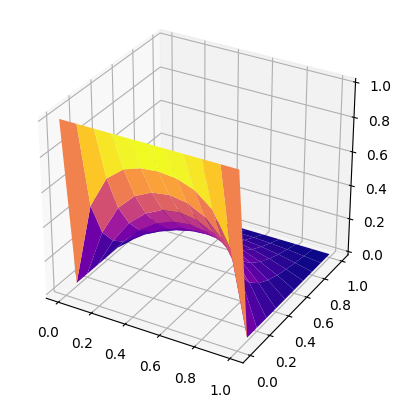

In [26]:
num_x = 10 # número de divisões, em x, do domínio
num_y = 10 # número de divisões, em y, do domínio
L = 1.0    # comprimento/largura da placa

xx = np.linspace(0.0, L, num_x + 1)
yy = np.linspace(0.0, L, num_y + 1)

x_coords, y_coords = np.meshgrid(xx, yy)

delta_x = L / num_x
delta_y = L / num_y
delta_t = 0.2 * pow(delta_x, 2)

temp = np.zeros((num_x + 1, num_y + 1), float)

# condições de contorno:
for i in range(num_x + 1):
    # temperatura superior:
    temp[0][i] = 1.0
new_temp = np.copy(temp)


final_k = 1000
for k in range(1, final_k + 1):
    for i in range(1, num_x):
        for j in range(1, num_y):
            # resolve para x:
            new_temp[j][i] += 0.2 * temp[j][i + 1]
            new_temp[j][i] -= 0.4 * temp[j][i]
            new_temp[j][i] += 0.2 * temp[j][i - 1]
            # resolve para y:
            new_temp[j][i] += 0.2 * temp[j + 1][i]
            new_temp[j][i] -= 0.4 * temp[j][i]
            new_temp[j][i] += 0.2 * temp[j - 1][i]
        temp = np.copy(new_temp)


# exibe a superfície:
fig = plt.figure()

surf = fig.add_subplot(projection = '3d')
surf.plot_surface(x_coords, y_coords, temp, cmap = cm.plasma)
surf.set_aspect('equal')